# Clustering

In [8]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Clustering

Clustering or cluster analysis is an **unsupervised learning problem**. It is often used as a data analysis technique for discovering interesting patterns in data. For example, you may need it for classifying diseases in medical science and classifying customers based on their behavior.

**In theory**, data points that are in the **same group should have similar properties** and/or features, while data points in **different groups should have highly dissimilar properties** and/or features. 

Evaluation of identified clusters is subjective and may require a domain expert, although many clustering-specific quantitative measures do exist. Typically, clustering algorithms are compared academically on synthetic datasets with pre-defined clusters, which an algorithm is expected to discover.


Most popular clustering algorithms are
- k-means
- mean-shift clustering
- DBSCAN
- EM using GMM
- Hierarchical clustering
- Spectral clustering


## 1. K-Means
Conventional k-means requires only a few steps:

1. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

2. Assignment of each data point to its nearest centroid

3. Recalculation of centroids (e.g. the mean of all the points for each cluster)

4. Repeat steps 2-3 untill the centroid positions do not change

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE).

**NOTE:** Multiple runs of k-means may provide different clusers. See the example of 2 different runs:

![kmeansURL](https://files.realpython.com/media/centroids_iterations.247379590275.gif "k-means")

To solve the problem , researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE.

Thankfully, there’s **a robust implementation** of k-means clustering in Python from the popular machine learning package **`scikit-learn`**

### Generation of the random data

You can generate the data using `make_blobs()`, a convenience function in **scikit-learn** used to generate synthetic clusters. `make_blobs()` uses these parameters:
- **n_samples** is the total number of samples to generate.
- **centers** is the number of centers to generate.
- **cluster_std** is the standard deviation.

The functions returns a tuple of two values: the data and cluster labels.

In [27]:
# Generate random data.
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

`random_states` (datatype: int) determines random number generation for dataset creation. Here the parameter is set to an integer value so you can follow the data presented in the tutorial. In practice, it’s best to leave `random_state` as the default value, `None`.

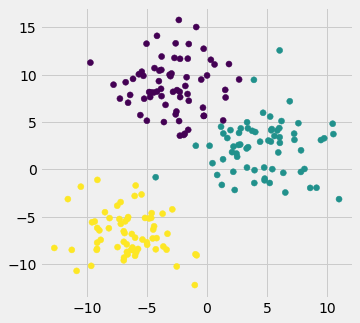

In [28]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=true_labels)

### Data Standartization

Data sets usually contain numerical features that have been measured in different units, such as height (in cm) and weight (in kg). A machine learning algorithm would consider weight less important than height only because the values for weight are smaller and have lower variability from person to person.

Clustering algorithms need to consider all features on an even playing field. That means **the values for all features must be transformed to the same scale**. The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for clustering algorithms because it can have a significant impact on the performance of your algorithm. There are several approaches to implementing feature scaling. More information is provided [here](https://scikit-learn.org/stable/modules/preprocessing.html).

In this example, you’ll use the `StandardScaler` class. This class implements a type of feature scaling called **standardization**. Standardization scales the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

K-Means has the following input parameters:

- **init controls** the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

- **n_clusters** sets the number of clusters $default=8$.

- **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments $default=10$.

- **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm $default=300$.

In [41]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling `.fit()`:

In [42]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [43]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [44]:
# The number of iterations required to converge
kmeans.n_iter_

2

The cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`

In [45]:
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2], dtype=int32)

## Compare the results: Initial Data with Ground Truth

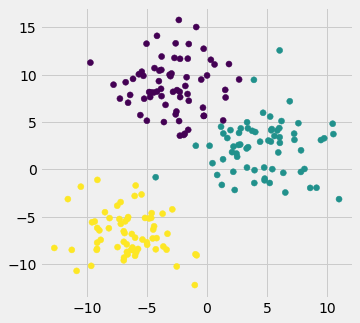

In [46]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=true_labels)

## Compare the results: K-means clustering

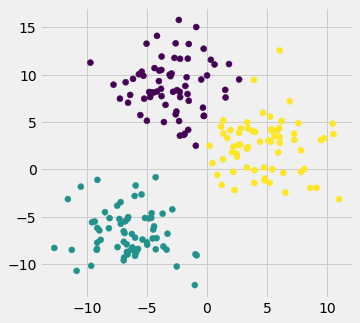

In [47]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=kmeans.labels_)

Note that the order of the cluster labels for the first two data objects was flipped. The order was [1, 0] in true_labels but [0, 1] in kmeans.labels_.

## Choosing the Appropriate Number of Clusters
One way to evaluate the appropriate number of clusters is to use the following methods:
1. **The elbow method**
2. **The silhouette coefficient**

These are often used as **complementary evaluation techniques** rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [48]:
sse = []
for k in range(1, 11):
    kmeans0 = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans0.fit(scaled_features)
    sse.append(kmeans0.inertia_)

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as **the elbow point**. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

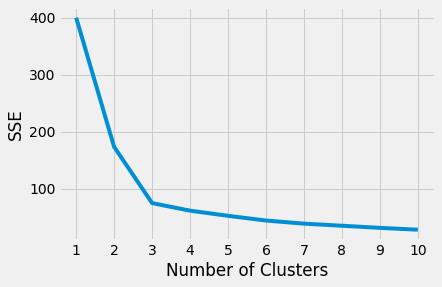

In [49]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, `kneed`, to identify the elbow point programmatically:

In [50]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

The **silhouette coefficient** is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

The `silhouette score()` function, which is implemented in `scikit-learn`, needs a minimum of two clusters, or it will raise an exception.

In [51]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans0 = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans0.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans0.labels_)
    silhouette_coefficients.append(score)

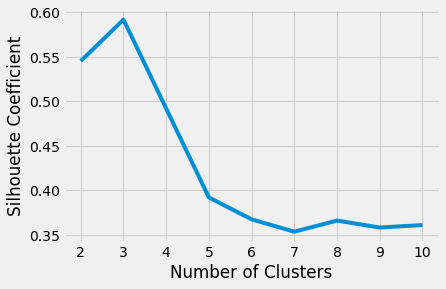

In [52]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 2. Mean Shift
**Mean shift clustering** involves finding and adapting centroids based on the density of examples in the feature space. A centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window.

Main steps:

1. Begin with a circular sliding window having its center at a randomly selected point C with radius r as the kernel. 
2. At every iteration, the window shifts towards the denser regions by changing the center point to the mean of the points within the window.
3. Continue shifting the window according to the mean until you reach the point where you accommodate the maximum number of points within it.
4. Repeat this process with multiple sliding windows until you come to a situation wherein all the points will lie within a window. In the case of overlapping of windows, the window having a higher number of points will prevail.

The main problem of the algorithm is to select the window size (the bandwidth). If not given, the bandwidth is estimated automatically using `sklearn.cluster.estimate_bandwidth`.

In [53]:
mshift = MeanShift()
mshift.fit(scaled_features)

MeanShift()

### Compare the results: Mean Shift clustering

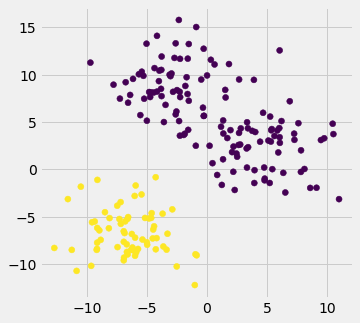

In [54]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=mshift.labels_)

## 3. DBSCAN

DBSCAN is a Density-Based Spatial Clustering of Applications with Noise. This algorithm does not require a pre-set number of clusters and allow to identify outliers as noise. It also finds arbitrarily shaped and sized clusters quite well.


Main steps:
1. Start with a random unvisited data point. All points within a distance eps(ɛ) are the neighborhood points. 
2. If # of neighborhood points > minPoints, the current data point becomes the first point in the cluster. Otherwise, the point gets labeled as ‘Noise.’ 
3. All points within the distance ɛ become part of the same cluster. 
4. Continue with the process until you visit and label each point within the ɛ neighborhood of the cluster. 
5. Repeat the procedure for all the new points added to the cluster group.
6. On completion of the process, start again with a new unvisited point thereby leading to the discovery of more clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise.


In [55]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(scaled_features)

DBSCAN(min_samples=3)

In [56]:
dbscan.labels_

array([ 0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0])

### Compare the results: DBSCAN clustering

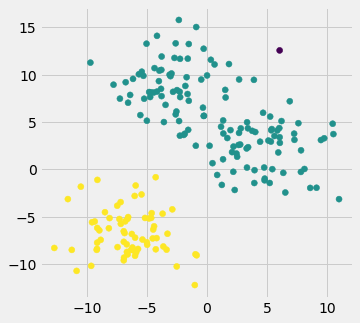

In [57]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=dbscan.labels_)

## 4. EM using GMM

EM using GMM is an Expectation-Maximization (EM) clustering using Gaussian Mixture Models (GMM).

**Main assumbption**: Every single cluster has a Gaussian distribution.

**Goal**: to find out the parameters of the Gaussian for each cluster

Main steps:

1. Define the total number of clusters and randomly initialize the Gaussian distribution parameters for each one of them.
2. With this background, calculate the probability of each data point belonging to a particular cluster. The closer the point is to the Gaussian’s center, the better are the chances of it belonging to the cluster.
3. Determine a new set of parameters for the Gaussian distributions to maximize the probabilities of data points within the clusters. A weighted sum of data point positions is used to compute these probabilities. The likelihood of the data point belonging to the particular cluster is the weight factor.
4. Repeat the steps 2 and 3 until convergence where there is not much variation.



In [58]:
em_gmm = GaussianMixture(n_components=3)
em_gmm_labels=em_gmm.fit_predict(scaled_features)

### Compare the results: EM with GMM clustering

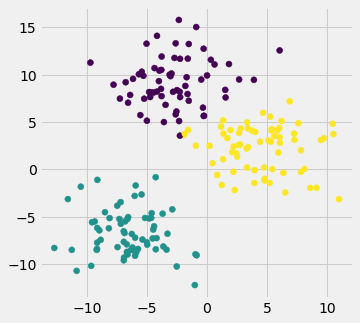

In [59]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=em_gmm_labels)

Note that EM with GMM also provides information about the probabilities for a particular point to be assigned in rach cluster.

In [60]:
probabilities = em_gmm.predict_proba(scaled_features)
probabilities

array([[2.71358115e-06, 4.76579419e-15, 9.99997286e-01],
       [9.99979599e-01, 1.48067095e-11, 2.04005155e-05],
       [3.96559399e-11, 9.99999997e-01, 3.21817352e-09],
       [1.86376370e-12, 1.00000000e+00, 3.26741105e-12],
       [8.35090110e-07, 9.99998415e-01, 7.50189506e-07],
       [6.48403626e-07, 9.99958701e-01, 4.06506734e-05],
       [9.97776474e-01, 1.52274530e-12, 2.22352564e-03],
       [2.23300566e-08, 9.99999904e-01, 7.37381766e-08],
       [6.23076137e-01, 1.49692979e-15, 3.76923863e-01],
       [7.85369158e-07, 9.99941303e-01, 5.79120772e-05],
       [3.20400224e-03, 8.40028797e-07, 9.96795158e-01],
       [6.15845346e-03, 8.85476552e-13, 9.93841547e-01],
       [2.29315259e-04, 2.39896385e-14, 9.99770685e-01],
       [1.30022873e-03, 3.85703569e-08, 9.98699733e-01],
       [1.11242099e-01, 4.88342390e-05, 8.88709067e-01],
       [1.94113017e-10, 9.99999999e-01, 7.32723749e-10],
       [9.99511924e-01, 2.92974098e-15, 4.88076405e-04],
       [1.91172771e-08, 9.99999

Let us see are the points which are on the edge of both clusters:

In [61]:
threshold = 0.6
for i in range(len(probabilities)):
    if max(probabilities[i])<0.6:
        print(features[i], probabilities[i])

[-1.93482274  3.62519329] [4.60661498e-01 1.84135507e-05 5.39320088e-01]
[-2.25685549  3.54847161] [5.15279190e-01 3.29863264e-05 4.84687823e-01]
[-0.24719911  5.65696609] [5.47745722e-01 1.46342557e-08 4.52254263e-01]
[-1.56424733  4.1659257 ] [4.96546449e-01 3.18466784e-06 5.03450367e-01]
[-0.27202528  5.62940926] [5.46677960e-01 1.62129319e-08 4.53322023e-01]
[-1.84380138  3.75276546] [4.68041838e-01 1.21487064e-05 5.31946013e-01]


## 5. Agglomerative Clustering

Agglomerative clustering involves merging examples until the desired number of clusters is achieved. It is implemented via the `AgglomerativeClustering` class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 3.

In [63]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

AgglomerativeClustering(n_clusters=3)

In general, you can construct a dendrogram to choose an appropriate number of clusters.

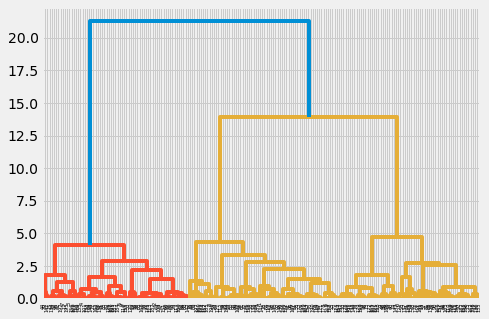

In [64]:
plt.figure(figsize=(7,5))
dend = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.show()

### Compare the results: Agglomerative clustering

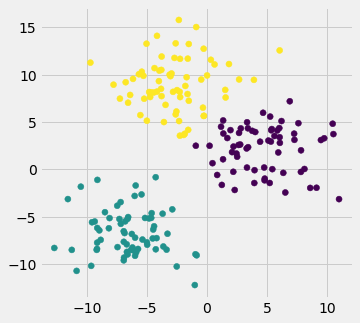

In [65]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=agglomerative.labels_)

## 6. Spectral Clustering

Spectral Clustering is a general class of clustering methods, drawn from linear algebra. It uses the top eigenvectors of a matrix derived from the distance between points.

It is implemented via the `SpectralClustering` class and the main Spectral Clustering is a general class of clustering methods, drawn from linear algebra. to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

In [69]:
spectral = SpectralClustering(n_clusters=3)
spectral.fit(scaled_features)

SpectralClustering(n_clusters=3)

### Compare the results: Spectral clustering

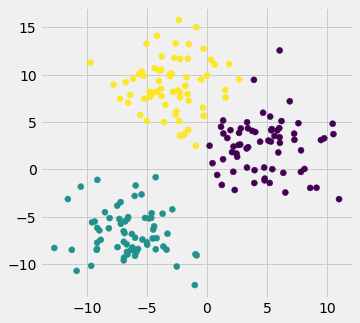

In [70]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=spectral.labels_)

## Compare clustering methods using the silhouette

In [72]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
mshift_silhouette = silhouette_score(scaled_features, mshift.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
em_gmm_silhouette = silhouette_score(scaled_features, em_gmm_labels).round(2)
agglomerative_silhouette = silhouette_score(scaled_features, agglomerative.labels_).round(2)
spectral_silhouette = silhouette_score(scaled_features, spectral.labels_).round(2)

ValueError: Found input variables with inconsistent numbers of samples: [200, 17]

Print the silhouette coefficient for each of the algorithms and compare them. A higher silhouette coefficient suggests better clusters.

In [73]:
kmeans_silhouette

0.59

In [74]:
mshift_silhouette

0.54

In [75]:
dbscan_silhouette

0.36

In [76]:
em_gmm_silhouette

0.58

In [77]:
agglomerative_silhouette

NameError: name 'agglomerative_silhouette' is not defined

In [78]:
spectral_silhouette

NameError: name 'spectral_silhouette' is not defined

We can conclude that k-means, agglomerative and spectral clustering algorithms perform better on this data.

# The Overal Results

ValueError: 'c' argument has 17 elements, which is inconsistent with 'x' and 'y' with size 200.

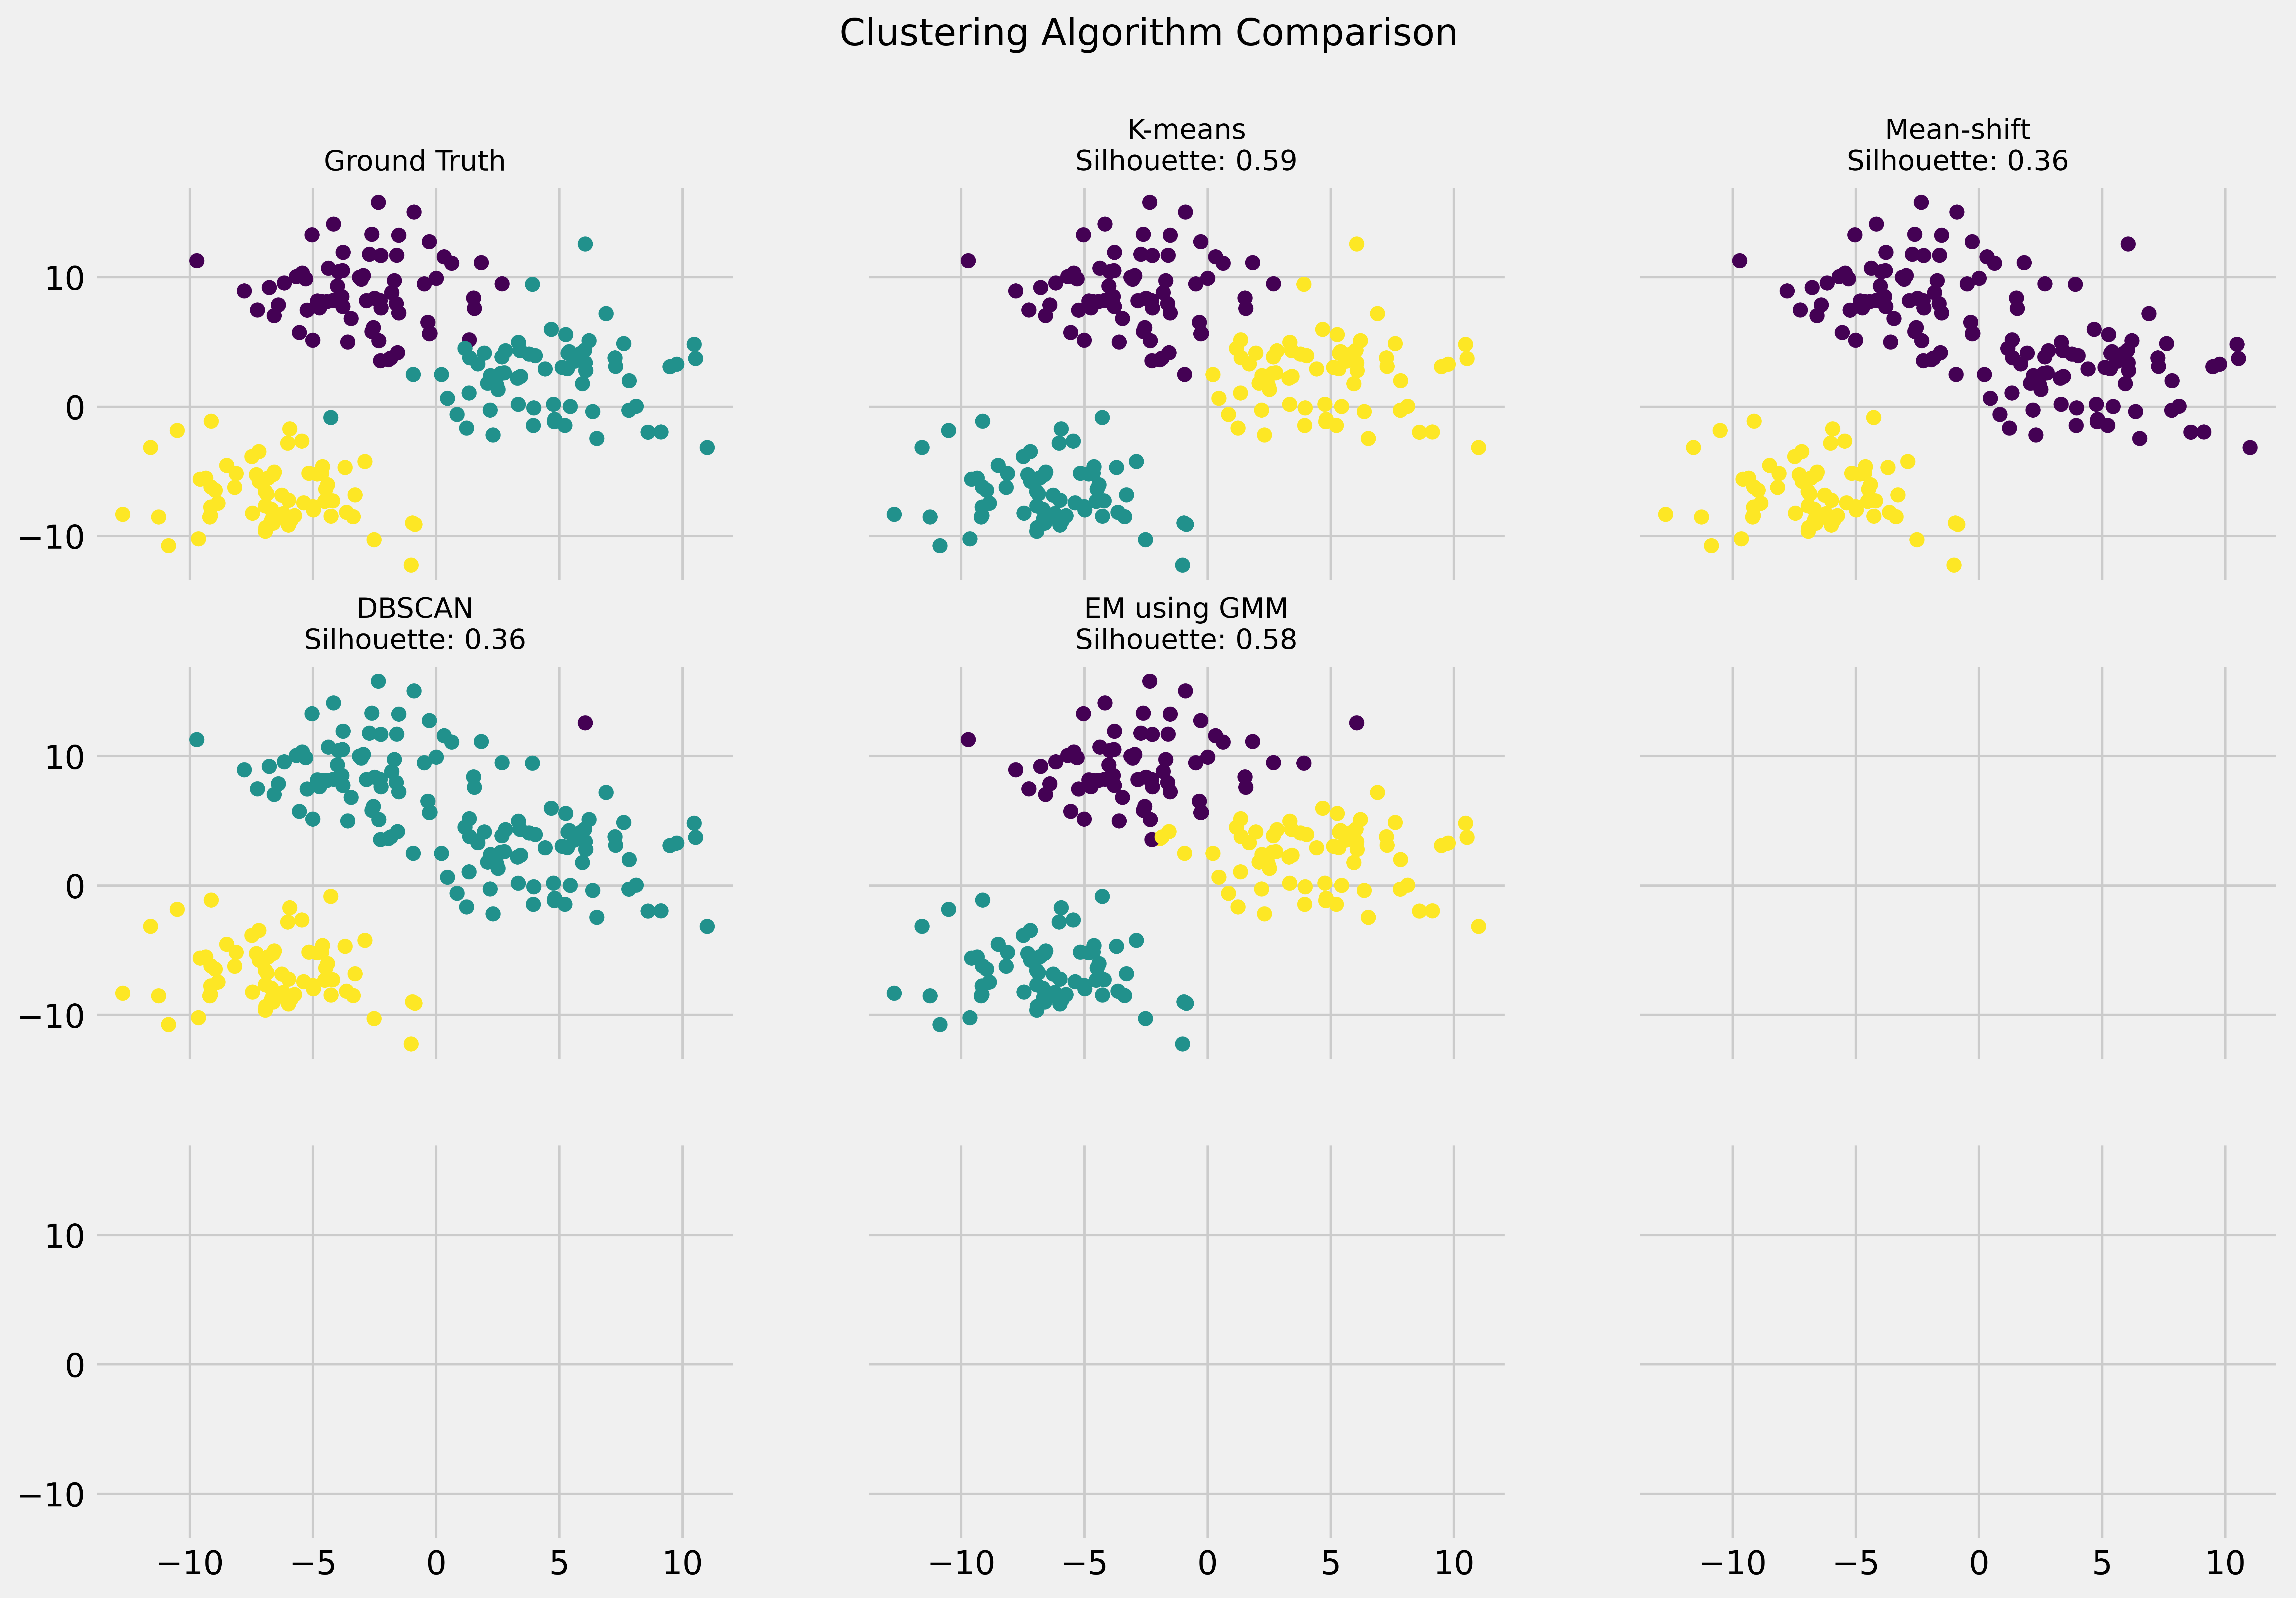

In [79]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True, dpi=600)
fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)
#fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#1f77b4", 3: "#ff7f0e",4: "#2ca02c",5: "#d62728", -1: "#9467bd"}

# The Ground Truth plot
ax[0,0].scatter(features[:, 0], features[:, 1], c=true_labels)
ax[0,0].set_title(f"Ground Truth", fontdict={"fontsize": 12})

# The k-means plot
ax[0,1].scatter(features[:, 0], features[:, 1], c=kmeans.labels_)
ax[0,1].set_title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The mean-shift plot
ax[0,2].scatter(features[:, 0], features[:, 1], c=mshift.labels_)
ax[0,2].set_title(f"Mean-shift\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
ax[1,0].scatter(features[:, 0], features[:, 1], c=dbscan.labels_)
ax[1,0].set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

# The EM using GMM
ax[1,1].scatter(features[:, 0], features[:, 1], c=em_gmm_labels)
ax[1,1].set_title(f"EM using GMM\nSilhouette: {em_gmm_silhouette}", fontdict={"fontsize": 12})

# The agglomerative plot
ax[1,2].scatter(features[:, 0], features[:, 1], c=agglomerative.labels_)
ax[1,2].set_title(f"Agglomerative clustering\nSilhouette: {agglomerative_silhouette}", fontdict={"fontsize": 12})

# The agglomerative plot
ax[2,1].scatter(features[:, 0], features[:, 1], c=spectral.labels_)
ax[2,1].set_title(f"Spectral clustering\nSilhouette: {spectral_silhouette}", fontdict={"fontsize": 12})

plt.show()

### Other clustering methods
**Affinity Propagation**: involves finding a set of exemplars that best summarize the data. The algorithmic complexity of affinity propagation is quadratic in the number of points.

Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages). **The default value is 0.5**


In [ ]:
affinity = AffinityPropagation(damping=0.7, max_iter=500, random_state=1)
affinity.fit(scaled_features)

#### Compare the results: Affinity Propagation clustering

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=affinity.labels_)

**BIRCH Clustering** (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

In [ ]:
birch = Birch(threshold=0.01, n_clusters=3)
birch.fit(scaled_features)

#### Compare the results: BIRCH clustering

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=birch.labels_)

**Mini-Batch K-Means** 

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

In [ ]:
minibatch = MiniBatchKMeans(n_clusters=3)
minibatch.fit(scaled_features)

#### Compare the results:Mini-Batch K-Means clustering

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=minibatch.labels_)

#### HDBSCAN

HDBSCAN is a clustering algorithm which extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters. 

In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(scaled_features)

#### Compare the results: HDBSCAN clustering

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=clusterer.labels_)

# Changing the Data

This time, use make_moons() to generate synthetic data in the shape of crescents:

In [ ]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
plt.scatter(features[:,0], features[:,1], c=true_labels)

Let us perform clustering algorithms on this data.

In [ ]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

Print the silhouette coefficient for each of the two algorithms and compare them. 

In [ ]:
kmeans_silhouette

In [ ]:
dbscan_silhouette

The silhouette coefficient is higher for the k-means algorithm. Let us vizualize the results of the clustering.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {0: "#008fd5", 1: "#fc4f30",}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

The DBSCAN algorithm appears to find more natural clusters according to the shape of the data. This suggests that you need a better method to compare the performance of these two clustering algorithms.

### Evaluating Clustering Performance Using the Ground Truth labels
The elbow method and silhouette coefficient evaluate clustering performance **without the use of ground truth labels**. 

**In practice, it’s rare to encounter datasets that have ground truth labels.** However, since the ground truth labels are known for this data, it’s possible to use a clustering metric that considers labels in its evaluation. 

You can use the `scikit-learn` implementation of a common metric called **the adjusted rand index (ARI)**. Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels. More abour clustering metrics is available [here](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics).

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:

In [ ]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(round(ari_kmeans, 2))
print(round(ari_dbscan, 2))

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters. Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.

# Applications

## Example 1: Image Segmentation (K-Means)

In [ ]:
import cv2 # If not installed please use "pip install opencv-python"
import urllib
import numpy as np

In [ ]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return image

### Image 1

Let us try to make image segmentation for one of the pictures from the website of [the HSE University](https://www.hse.ru/buildinghse).

In [ ]:
image = url_to_image(r"https://www.hse.ru/data/2020/10/28/1359150404/3%D0%A8%D0%B0%D0%B1%D0%BE%D0%BB%D0%BE%D0%B2%D0%BA%D0%B0_%D0%94%D0%9F-83.jpg") 
plt.imshow(image)

Now we have to prepare the data for K means. The image is a 3-dimensional shape but to apply k-means clustering on it we need to reshape it to a 2-dimensional array.

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) and converting to float type 
pixel_vals = np.float32(image.reshape((-1,3)))

Let us perform k-means clustering with 2 clusters.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pixel_vals)

**The results (k=2)**

In [ ]:
labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions 
plt.imshow(segmented_image)

If we perform k-means clustering with 16 clusters, the resulting image will be the following.

In [ ]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(pixel_vals)

labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions 
plt.imshow(segmented_image)

Optimal number of colors (elbow method)

In [ ]:
sse = []
for k in range(1, 17):
    kmeans0 = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans0.fit(pixel_vals)
    sse.append(kmeans0.inertia_)
    
plt.plot(range(1, 17), sse)
plt.xticks(range(1, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 17), sse, curve="convex", direction="decreasing")
kl.elbow

Optimal number of colors (silhouette coefficient)

In [ ]:
silhouette_coefficients = []

for k in range(2, 17):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10,max_iter=300,random_state=42)
    kmeans.fit(pixel_vals)
    score = silhouette_score(pixel_vals, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2, 17), silhouette_coefficients)
plt.xticks(range(2, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Image 2

Let us take another picture

In [ ]:
image = url_to_image(r"https://www.hse.ru/data/2020/06/10/1606383402/24889361570_d148a74529_b.jpg") 
plt.imshow(image)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) and converting to float type 
pixel_vals = np.float32(image.reshape((-1,3)))

Let us perform k-means clustering for using 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pixel_vals)

labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)
segmented_data = centers[labels.flatten()] 
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions 
plt.imshow(segmented_image)

Let us vizualize only 1 color (cluster #1).

In [ ]:
segmented_data1 = segmented_data.copy()
cluster = 1

for i in range(len(labels)):
    if labels[i]!=cluster:
        segmented_data1[i] = [255, 255, 255]
segmented_image1 = segmented_data1.reshape((image.shape)) # reshape data into the original image dimensions 
plt.imshow(segmented_image1)

## Example 2: Clustering of digits

Let us consider the load_digits (we already used the dataset on Day 3) which contains 1797 samples of hand-written digits (8x8 pixel images). The total number of dimensions is 64.

Clustering algorithms can be used to identify objects of the same groups. Here we will attempt to use k-means to try to identify similar digits **without using the original label information**; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

The clustering can be performed as we did before:

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that **even without the labels**, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits! Let's check the confusion matrix for this:

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
mat = confusion_matrix(digits.target, labels)
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

One could apply the clustering algorithms to principle components instead of initial 64-dimensional data.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.80)
principalComponents = pca.fit_transform(digits.data)
print("Number of components:", principalComponents.shape[1])

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(principalComponents)
kmeans.cluster_centers_.shape

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
print("The accuracy is", accuracy_score(digits.target, labels))

mat = confusion_matrix(digits.target, labels)
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Other methods:

**EM with GMM**

In [ ]:
em_gmm = GaussianMixture(n_components=10)
em_gmm_labels=em_gmm.fit_predict(digits.data)

In [ ]:
clusters = em_gmm_labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
print("The accuracy is", accuracy_score(digits.target, labels))

mat = confusion_matrix(digits.target, labels)
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Agglomerative clustering**

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative.fit(digits.data)

In [ ]:
clusters = agglomerative.labels_
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
print("The accuracy is", accuracy_score(digits.target, labels))

mat = confusion_matrix(digits.target, labels)
sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');